In [2]:
api_key = None

with open(".env", "r") as f:
    for line in f:
        if line.startswith("OPENAI_API_KEY"):
            api_key = line.split("=")[1].strip()

In [3]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

In [31]:
def check_similarity_in_name_with_explanation(name_1, name_2, model="gpt-4o-mini"):
    completions = client.chat.completions.create(
        temperature=0,
        top_p=0.95,
        model=model,
        messages=[
            { "role": "system", "content": "You are a helpful assistant tasked with possible similarity of background between individuals"},
            { "role": "user", "content": f"""What is the similarity between Person: A: {name_1} and Person B: {name_2}, Provide your response in this format
             ```json
                    {{
                        "SimilarityExplanation": "string", // Explain the reasoning behind your answer.
                        "SimilarityScore": "number" // Similarity score between 0 and 100
                    }}
             ```
             """ }
        ]
    )

    return completions.choices[0].message.content

In [32]:
def check_similarity_in_name(name_1, name_2, model="gpt-4o-mini"):
    completions = client.chat.completions.create(
        temperature=0,
        top_p=0.95,
        model=model,
        messages=[
            { "role": "system", "content": "You are a helpful assistant tasked with finding the possible similarity of background between individuals."},
            { "role": "user", "content": f"""What is the similarity between Person: A: {name_1} and Person B: {name_2}, Provide your response in this format (with no comments or extra information)
             ```json
                    {{
                        "SimilarityScore": "number" // Similarity score between 0 and 100
                    }}
             ```
             """ }
        ]
    )

    return completions.choices[0].message.content

In [6]:
check_similarity_in_name("Robert Brown", "Malik Jamari Bennett")

'```json\n{\n    "SimilarityScore": "25"\n}\n```'

In [7]:
check_similarity_in_name("Robert Brown", "Barbara Thompson")

'```json\n{\n    "SimilarityScore": "25"\n}\n```'

In [8]:
check_similarity_in_name("Robert Brown", "Michael Anderson")

'```json\n{\n    "SimilarityScore": "25"\n}\n```'

In [9]:
check_similarity_in_name_with_explanation("Robert Brown", "Malik Jamari Bennett")

'```json\n{\n    "SimilarityExplanation": "Both individuals may share commonalities in their cultural backgrounds, as both names suggest a potential connection to African American heritage. Additionally, they may have similar life experiences or challenges related to their backgrounds, which could influence their perspectives and interactions in society.",\n    "SimilarityScore": 65\n}\n```'

In [10]:
check_similarity_in_name_with_explanation("Robert Brown", "Barbara Thompson")

'```json\n{\n    "SimilarityExplanation": "Robert Brown and Barbara Thompson may share similarities in their backgrounds if they have common educational experiences, professional fields, or cultural backgrounds. However, without specific information about their careers, education, or personal histories, it is difficult to determine a precise similarity. Assuming they have no known connections, the similarity score would be low.",\n    "SimilarityScore": 20\n}\n```'

In [11]:
check_similarity_in_name_with_explanation("Robert Brown", "Micheal Anderson")

'```json\n{\n    "SimilarityExplanation": "Both Robert Brown and Michael Anderson are common names in English-speaking countries, which may suggest they share a similar cultural background. However, without additional context such as their professions, interests, or personal histories, it is difficult to determine a significant similarity beyond their names.",\n    "SimilarityScore": 30\n}\n```'

In [12]:
## gather 100 names of two groups from the dataset.
import pandas as pd
import glob

class Person:
    def __init__(self, **kwargs):
        ## assign all args to self.
        for key, value in kwargs.items():
            setattr(self, key, value)
    def __str__(self):
        return f"""
            {self.name} is a {self.occupation} who is {self.age} years old.
            They have an annual income of {self.income}
            They are quite interested in {self.hobbies}
        """
    def assign_position(self, x, y):
        self.x = x
        self.y = y
    
class USPerson(Person):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.income = str(self.income) + " USD"

In [13]:
sampled_agent_files = glob.glob("raw_agents/*sampled*.json")
sampled_agent_files

['raw_agents\\india_exp_agents_sampled.json',
 'raw_agents\\us_exp_agents_sampled.json']

In [14]:
import json

with open(sampled_agent_files[1], "r") as f:
    data = json.load(f)

In [15]:
us_agents = [USPerson(**agent) for agent in data]

In [16]:
df = pd.DataFrame([agent.__dict__ for agent in us_agents])
df.head()

,id,name,name_group,occupation,occupation_group,age,age_group,income,income_group,hobbies,hobbies_group
0,229,Poonam Sinha,as,Real Estate Agent,sales,49,48.0–90.0,62541 USD,Middle Income,learning languages and chess,intellectual
1,851,Darnell Scott,af,Plumber,craft_repair,66,48.0–90.0,46486 USD,Lower-Middle Income,organizing charity events and networking,social
2,360,Dong-Hyun Kim,as,Billing Clerk,adm_clerical,77,48.0–90.0,42243 USD,Lower-Middle Income,yoga and hiking,physical
3,2141,Esteban Joaquï¿½n Carvajal,hi,Insurance Agent,sales,19,17.0–28.0,233768 USD,High Income,dancing and hiking,physical
4,1789,Beatriz Montiel,hi,Operations Manager,exec_managerial,24,17.0–28.0,15455 USD,Low Income,martial arts and running,physical


In [17]:
df['name_group'].value_counts()

name_group
eu    107
hi    106
as     94
af     93
Name: count, dtype: int64

In [18]:
## take 50 names from 'eu' and 50 names from 'af'
eu_agents = df[df['name_group'] == 'eu']
af_agents = df[df['name_group'] == 'af']

eu_agents = eu_agents.sample(50)
af_agents = af_agents.sample(50)

eu_names = eu_agents['name'].tolist()
af_names = af_agents['name'].tolist()

eu_names[:5], af_names[:5]

(['Lydia Bell  ',
  'Liam Brown',
  'Jacob Carter',
  'George Patrick Green  ',
  'Autumn Rivera  '],
 ['Kwame Robertson',
  'Lamar Brown  ',
  'Tasha Simmons',
  'Dion Lee  ',
  'Omari Devon Barnes  '])

In [19]:
# eu_agents.to_dict()

In [54]:
eu_ids = eu_agents['id'].tolist()
af_ids = af_agents['id'].tolist()
eu_grps = eu_agents['name_group'].tolist()
af_grps = af_agents['name_group'].tolist()

all_agents = [(id, name.strip(), grp) for id, name, grp in zip(eu_ids, eu_names, eu_grps)] + [(id, name, grp) for id, name, grp in zip(af_ids, af_names, af_grps)]

In [55]:
scores_with_explanation_dict = {}
scores_dict = {}

args = []

for agent in all_agents:
    for agent_2 in all_agents:
        if agent[0] != agent_2[0]:
            args.append((agent, agent_2))

In [56]:
len(args), args[:5]

(9900,
 [((2284, 'Lydia Bell', 'eu'), (2369, 'Liam Brown', 'eu')),
  ((2284, 'Lydia Bell', 'eu'), (2694, 'Jacob Carter', 'eu')),
  ((2284, 'Lydia Bell', 'eu'), (2803, 'George Patrick Green', 'eu')),
  ((2284, 'Lydia Bell', 'eu'), (2796, 'Autumn Rivera', 'eu')),
  ((2284, 'Lydia Bell', 'eu'), (2759, 'Reem Salim', 'eu'))])

In [33]:
def compute_score(agent_1, agent_2, model = "gpt-4o-mini"):
    try:
        json_sim = check_similarity_in_name(agent_1[1], agent_2[1], model)
        json_sim = json_sim.replace("```json", "").replace("```", "").strip()
        parsed_sim = json.loads(json_sim)
        sim_score = int(parsed_sim['SimilarityScore'])
    except:
        sim_score = 0
    try:
        json_sim_exp = check_similarity_in_name_with_explanation(agent_1[1], agent_2[1], model)
        json_sim_exp = json_sim_exp.replace("```json", "").replace("```", "").strip()
        parsed_sim_exp = json.loads(json_sim_exp)
        sim_score_exp = int(parsed_sim_exp['SimilarityScore'])
    except:
        sim_score_exp = 0
    print(f"Comparing {agent_1[1]} with {agent_2[1]}. Similarity Score: {sim_score}, Similarity Score with Explanation: {sim_score_exp}")
    return agent_1[0], agent_2[0], sim_score, sim_score_exp    

In [26]:
compute_score(all_agents[0], all_agents[1])

Comparing Lydia Bell with Liam Brown. Similarity Score: 25, Similarity Score with Explanation: 50


(2284, 2369, 25, 50)

In [27]:
import concurrent.futures

with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    results = {executor.submit(compute_score, arg[0], arg[1]): arg for arg in args}
    for future in concurrent.futures.as_completed(results):
        id_1, id_2, score, score_exp = future.result()
        scores_dict[(id_1, id_2)] = score
        scores_with_explanation_dict[(id_1, id_2)] = score_exp

# with open("us_raw_data/scores_dict.json", "w") as f:
#     json.dump(scores_dict, f)

# with open("us_raw_data/scores_with_explanation_dict.json", "w") as f:
#     json.dump(scores_with_explanation_dict, f)

Comparing Lydia Bell with Arabella Cox. Similarity Score: 45, Similarity Score with Explanation: 45
Comparing Lydia Bell with Jacob Carter. Similarity Score: 25, Similarity Score with Explanation: 50
Comparing Lydia Bell with Alan Thomas Myers. Similarity Score: 0, Similarity Score with Explanation: 50
Comparing Lydia Bell with Jessica Ann Holcomb. Similarity Score: 0, Similarity Score with Explanation: 30
Comparing Lydia Bell with Autumn Rivera. Similarity Score: 0, Similarity Score with Explanation: 50
Comparing Lydia Bell with Reem Salim. Similarity Score: 25, Similarity Score with Explanation: 50
Comparing Lydia Bell with George Patrick Green. Similarity Score: 25, Similarity Score with Explanation: 30
Comparing Lydia Bell with Aaron Perry. Similarity Score: 0, Similarity Score with Explanation: 30
Comparing Lydia Bell with Carl Patrick Lowery. Similarity Score: 25, Similarity Score with Explanation: 30
Comparing Lydia Bell with Scarlett Hughes. Similarity Score: 0, Similarity Scor

TypeError: keys must be str, int, float, bool or None, not tuple

In [41]:
json_scores_dict = {}
json_scores_with_explanation_dict = {}

for key, value in scores_dict.items():
    json_scores_dict[f"score_{key[0]}_{key[1]}"] = value

for key, value in scores_with_explanation_dict.items():
    json_scores_with_explanation_dict[f"score_{key[0]}_{key[1]}"] = value

In [42]:
with open("us_raw_data/scores_dict.json", "w") as f:
    json.dump(json_scores_dict, f)

In [43]:
with open("us_raw_data/scores_dict_with_explanation.json", "w") as f:
    json.dump(json_scores_with_explanation_dict, f)

In [34]:
compute_score(all_agents[0], all_agents[1], model="gpt-3.5-turbo")

Comparing Lydia Bell with Liam Brown. Similarity Score: 65, Similarity Score with Explanation: 85


(2284, 2369, 65, 85)

In [35]:
scores_dict_gpt_3_5_turbo = {}
scores_with_explanation_dict_gpt_3_5_turbo = {}

In [36]:
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    results = {executor.submit(compute_score, arg[0], arg[1], "gpt-3.5-turbo"): arg for arg in args}
    for future in concurrent.futures.as_completed(results):
        id_1, id_2, score, score_exp = future.result()
        scores_dict_gpt_3_5_turbo[(id_1, id_2)] = score
        scores_with_explanation_dict_gpt_3_5_turbo[(id_1, id_2)] = score_exp

Comparing Lydia Bell with Liam Brown. Similarity Score: 65, Similarity Score with Explanation: 85
Comparing Lydia Bell with Jessica Ann Holcomb. Similarity Score: 65, Similarity Score with Explanation: 85
Comparing Lydia Bell with George Patrick Green. Similarity Score: 30, Similarity Score with Explanation: 85
Comparing Lydia Bell with Arabella Cox. Similarity Score: 75, Similarity Score with Explanation: 70
Comparing Lydia Bell with Jacob Carter. Similarity Score: 65, Similarity Score with Explanation: 85
Comparing Lydia Bell with Autumn Rivera. Similarity Score: 75, Similarity Score with Explanation: 85
Comparing Lydia Bell with Alan Thomas Myers. Similarity Score: 45, Similarity Score with Explanation: 85
Comparing Lydia Bell with Reem Salim. Similarity Score: 30, Similarity Score with Explanation: 75
Comparing Lydia Bell with Aaron Perry. Similarity Score: 65, Similarity Score with Explanation: 85
Comparing Lydia Bell with Carl Patrick Lowery. Similarity Score: 32, Similarity Scor

In [47]:
json_scores_dict_gpt_3_5_turbo = {}
json_scores_with_explanation_dict_gpt_3_5_turbo = {}

for key, value in scores_dict_gpt_3_5_turbo.items():
    json_scores_dict_gpt_3_5_turbo[f"score_{key[0]}_{key[1]}"] = value

for key, value in scores_with_explanation_dict_gpt_3_5_turbo.items():
    json_scores_with_explanation_dict_gpt_3_5_turbo[f"score_{key[0]}_{key[1]}"] = value

In [49]:
with open("us_raw_data/scores_dict_gpt_3_5_turbo.json", "w") as f:
    json.dump(json_scores_dict_gpt_3_5_turbo, f, indent=4)

In [50]:
with open("us_raw_data/scores_dict_with_explanation_gpt_3_5_turbo.json", "w") as f:
    json.dump(json_scores_with_explanation_dict_gpt_3_5_turbo, f, indent=4)

In [57]:
with open("us_raw_data/name_only_agents.json", "w") as f:
    json.dump(all_agents, f, indent=4)

In [91]:
class Agent:
    def __init__(self, name, id, grp):
        self.name = name
        self.id = id
        self.grp = grp
    def assign_position(self, x, y):
        self.x = x
        self.y = y

In [81]:
loaded_dicts = {}
with open("us_raw_data/scores_dict.json", "r") as f:
    loaded_dicts['scores_dict'] = json.load(f)
with open("us_raw_data/scores_dict_with_explanation.json", "r") as f:
    loaded_dicts['scores_dict_with_explanation'] = json.load(f)
with open("us_raw_data/scores_dict_gpt_3_5_turbo.json", "r") as f:
    loaded_dicts['scores_dict_gpt_3_5_turbo'] = json.load(f)
with open("us_raw_data/scores_dict_with_explanation_gpt_3_5_turbo.json", "r") as f:
    loaded_dicts['scores_dict_with_explanation_gpt_3_5_turbo'] = json.load(f)

In [82]:
## convert to dataframe.
df = pd.DataFrame(loaded_dicts['scores_dict'].items(), columns=['id', 'score'])
df.head()

,id,score
0,score_2284_2755,45
1,score_2284_2694,25
2,score_2284_2866,0
3,score_2284_2251,0
4,score_2284_2796,0


In [83]:
stats = df['score'].describe()
stats

count    9900.000000
mean       21.652525
std        15.995171
min         0.000000
25%         0.000000
50%        25.000000
75%        25.000000
max       100.000000
Name: score, dtype: float64

(array([2.590e+03, 0.000e+00, 1.250e+02, 1.440e+02, 1.250e+02, 5.271e+03,
        2.000e+02, 0.000e+00, 0.000e+00, 1.236e+03, 1.600e+01, 0.000e+00,
        5.000e+00, 3.500e+01, 2.500e+01, 9.700e+01, 2.000e+00, 2.700e+01,
        0.000e+00, 2.000e+00]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <BarContainer object of 20 artists>)

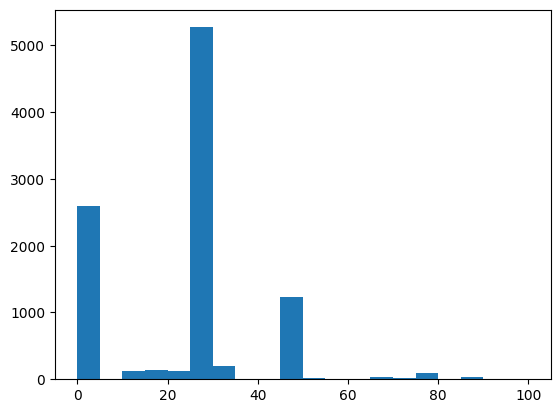

In [84]:
## plot.
import matplotlib.pyplot as plt

plt.hist(df['score'], bins=20)

In [85]:
stats.to_dict()

{'count': 9900.0,
 'mean': 21.65252525252525,
 'std': 15.99517140642481,
 'min': 0.0,
 '25%': 0.0,
 '50%': 25.0,
 '75%': 25.0,
 'max': 100.0}

In [86]:
loaded_stats = {}
loaded_stats["scores_dict"] = pd.DataFrame(loaded_dicts['scores_dict'].items(), columns=['id', 'score'])['score'].describe().to_dict()
loaded_stats["scores_dict_with_explanation"] = pd.DataFrame(loaded_dicts['scores_dict_with_explanation'].items(), columns=['id', 'score'])['score'].describe().to_dict()
loaded_stats["scores_dict_gpt_3_5_turbo"] = pd.DataFrame(loaded_dicts['scores_dict_gpt_3_5_turbo'].items(), columns=['id', 'score'])['score'].describe().to_dict()
loaded_stats["scores_dict_with_explanation_gpt_3_5_turbo"] = pd.DataFrame(loaded_dicts['scores_dict_with_explanation_gpt_3_5_turbo'].items(), columns=['id', 'score'])['score'].describe().to_dict()

In [87]:
for key in loaded_dicts.keys():
    print(key, len(loaded_dicts[key]))

scores_dict 9900
scores_dict_with_explanation 9900
scores_dict_gpt_3_5_turbo 9900
scores_dict_with_explanation_gpt_3_5_turbo 9900


In [276]:
## mode between 4omini | 4omini-with-exp | 3.5-turbo | 3.5-turbo-with-exp
## setting between 25per-favourable | 50per-favourable | 75per-favourable | 50per-veryfavourable | 50per-somewhatfavourable.
## width fixed at 15.
## height fixed at 15.

import random
import numpy as np

class Grid:
    def __init__(self, mode = "4omini", setting = "50per-favourable", width = 15, height=15):
        if mode == "4omini":
            self.scores_dict = loaded_dicts['scores_dict']
            self.stats = loaded_stats['scores_dict']
        elif mode == "4omini-with-exp":
            self.scores_dict = loaded_dicts["scores_dict_with_explanation"]
            self.stats = loaded_stats['scores_dict_with_explanation']
        elif mode == "3.5-turbo":
            self.scores_dict = loaded_dicts["scores_dict_gpt_3_5_turbo"]
            self.stats = loaded_stats['scores_dict_gpt_3_5_turbo']
        elif mode == "3.5-turbo-with-exp":
            self.scores_dict = loaded_dicts["scores_dict_with_explanation_gpt_3_5_turbo"]
            self.stats = loaded_stats['scores_dict_with_explanation_gpt_3_5_turbo']
        else:
            raise ValueError("Invalid mode. Choose between 4omini | 4omini-with-exp | 3.5-turbo | 3.5-turbo-with-exp")
        self.setting = setting
        self.agents = [Agent(agent[1], agent[0], agent[2]) for agent in all_agents]
        self.width, self.height = width, height
        self.grid = [[None for _ in range(self.width)] for _ in range(self.height)]
        ## choose len(agents) random positions.
        all_positions = [(x, y) for x in range(self.width) for y in range(self.height)]
        random_positions = random.sample(all_positions, len(self.agents))
        for agent, position in zip(self.agents, random_positions):
            agent.assign_position(*position)
            self.grid[position[0]][position[1]] = agent
        self.same_group_percentages = []
    
    def get_neighbours(self, x, y):
        neighbours = []
        if x > 0:
            neighbours.append(self.grid[x-1][y])
        if x < self.width - 1:
            neighbours.append(self.grid[x+1][y])
        if y > 0:
            neighbours.append(self.grid[x][y-1])
        if y < self.height - 1:
            neighbours.append(self.grid[x][y+1])
        if x > 0 and y > 0:
            neighbours.append(self.grid[x-1][y-1])
        if x < self.width - 1 and y < self.height - 1:
            neighbours.append(self.grid[x+1][y+1])
        if x > 0 and y < self.height - 1:
            neighbours.append(self.grid[x-1][y+1])
        if x < self.width - 1 and y > 0:
            neighbours.append(self.grid[x+1][y-1])
        filtered_neighbours = [n for n in neighbours if n is not None]
        return filtered_neighbours

    def check_satisfaction(self, agent, x, y):
        ## check all 8 neighbours.
        neighbours = self.get_neighbours(x, y)
        scores = [self.scores_dict[f"score_{agent.id}_{neighbour.id}"] for neighbour in neighbours]
        if len(scores) == 0:
            return False
        per_n, condition = self.setting.split("-")
        per_n = int(per_n.split("per")[0])
        count_n = per_n * len(scores) // 100
        if condition == "favourable":
            ## atleast `count_n` neighbours should have compatibility score greater than 50th percentile.
            return len([x for x in scores if x >= self.stats["50%"]]) >= count_n
        elif condition == "veryfavourable":
            ## atleast `count_n` neighbours should have compatibility score greater than 75th percentile.
            return len([x for x in scores if x >= self.stats["75%"]]) >= count_n
        elif condition == "somewhatfavourable":
            ## atleast `count_n` neighbours should have compatibility score greater than 25th percentile.
            return len([x for x in scores if x >= self.stats["25%"]]) >= count_n
        else:
            raise ValueError("Condition can only be 'favourable', 'veryfavourable' or 'somewhatfavourable'.")
        
    def simulate_round(self):
        unsatisfied_agents = []
        for agent in self.agents:
            x, y = agent.x, agent.y
            if not self.check_satisfaction(agent, x, y):
                unsatisfied_agents.append(agent)
        
        unoccupied_cells = [(x, y) for x in range(self.width) for y in range(self.height) if self.grid[x][y] is None]

        for agent in unsatisfied_agents:
            ## randomly select a cell.
            if len(unoccupied_cells) == 0:
                break
            nx, ny = unoccupied_cells[np.random.choice(range(len(unoccupied_cells)))]
            self.grid[nx][ny] = agent
            self.grid[agent.x][agent.y] = None            
            agent.assign_position(nx, ny)
            unoccupied_cells.remove((nx, ny))
        
        return len(unsatisfied_agents)

    def analyze(self):
        ## get similarity% for each group_param.
        total_similarity = 0
        g = "grp"
        for agent in self.agents:
            neighbours = self.get_neighbours(agent.x, agent.y)
            if len(neighbours) == 0:
                continue
            similarity = len([n for n in neighbours if getattr(n, g) == getattr(agent, g)]) / len(neighbours)
            total_similarity += similarity
        self.same_group_percentages.append(total_similarity / len(self.agents))
        return total_similarity / len(self.agents)
    
    def simulate(self, max_rounds = 100):
        round = 0
        self.analyze()
        self.snapshot(round)
        while round < max_rounds:
            unsatisfied = self.simulate_round()
            round += 1
            self.analyze()
            self.snapshot(round)
            if unsatisfied == 0:
                break
    
    def plot(self):
        plt.plot(self.same_group_percentages)
        plt.xlabel("Round")
        plt.ylabel("Similarity Percentage")
        plt.title("Similarity Percentage over Rounds")
        plt.show()
    
    def snapshot(self, round):
        ## get the grid with groups stored in a file.
        def get_attributes(agent):
            if agent is not None:
                return getattr(agent, "grp")
            else:
                return "None"

        with open(f"us_raw_data/grid_positions_round_{round}.json", "w") as f:
            json.dump([[get_attributes(agent) for agent in row] for row in self.grid], f, indent=4)

In [277]:
class SimpleGrid(Grid):
    def get_neighbours(self, x, y):
        neighbours = []
        if x > 0:
            neighbours.append(self.grid[x-1][y])
        if x < self.width - 1:
            neighbours.append(self.grid[x+1][y])
        if y > 0:
            neighbours.append(self.grid[x][y-1])
        if y < self.height - 1:
            neighbours.append(self.grid[x][y+1])
        filtered_neighbours = [n for n in neighbours if n is not None]
        return filtered_neighbours

In [284]:
import os

round_files = glob.glob("us_raw_data/grid_positions_round_*.json")

for file in round_files:
    os.remove(file)

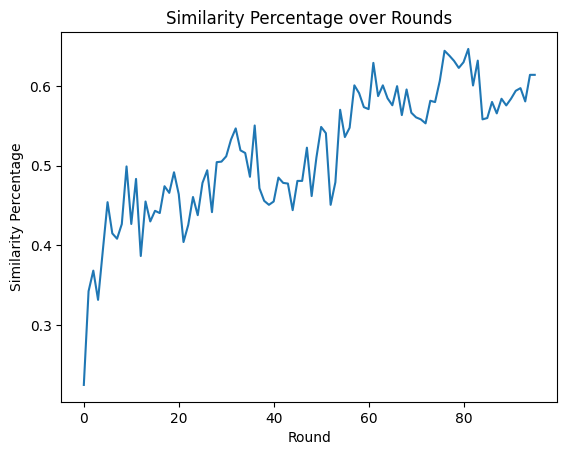

In [310]:
grid = Grid(mode = "3.5-turbo", setting="60per-veryfavourable", width=30, height=30)
grid.simulate(100)
grid.plot()

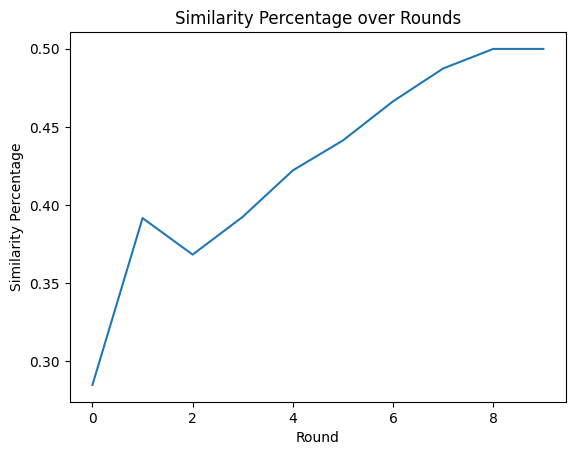

In [309]:
grid = Grid(mode = "4omini", setting="60per-veryfavourable", width=30, height=30)
grid.simulate(100)
grid.plot()

In [298]:
round_files = glob.glob("us_raw_data/grid_positions_round_*.json")
def plot_grid(grid_file):
    with open(grid_file, "r") as f:
        data = json.load(f)
    
    _, ax = plt.subplots()

    def get_neighbours(x, y):
        if x > 0:
            yield x-1, y
        if x < len(data) - 1:
            yield x+1, y
        if y > 0:
            yield x, y-1
        if y < len(data[0]) - 1:
            yield x, y+1
        if x > 0 and y > 0:
            yield x-1, y-1
        if x < len(data) - 1 and y < len(data[0]) - 1:
            yield x+1, y+1
        if x > 0 and y < len(data[0]) - 1:
            yield x-1, y+1
        if x < len(data) - 1 and y > 0:
            yield x+1, y-1

    for i in range(len(data)):
        for j in range(len(data[0])):
            if data[i][j] == "None":
                continue
            grp = data[i][j]
            flag = True
            for x, y in get_neighbours(i, j):
                if data[x][y] == grp:
                    flag = False
                    break
            col = "red" if grp == "eu" else "blue"
            if flag:
                ax.text(j, -i, grp, ha='center', va='center', fontsize=10, color = col)
                circle = plt.Circle((j, -i), 0.5, color=col, fill=False)
                ax.add_artist(circle)
            else:
                ax.text(j, -i, grp, ha='center', va='center', fontsize=10, color = col)

    # ax.set_xticks(np.arange(len(data[0])))
    # ax.set_yticks(-np.arange(len(data)))
    # ax.grid(which='both')

    ax.set_xlim(-0.5, len(data[0]) - 0.5)
    ax.set_ylim(-len(data) + 0.5, -0.5)

    plt.show()

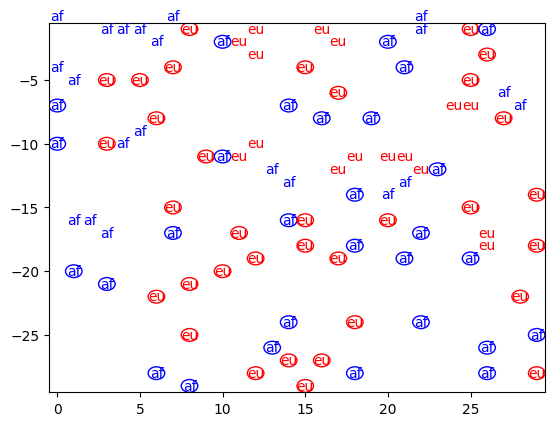

In [299]:
plot_grid(round_files[0])

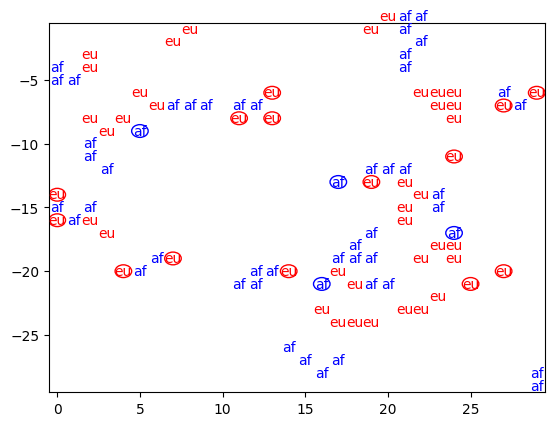

In [300]:
plot_grid(round_files[-1])

In [ ]:
grid = Grid(mode = "3.5-turbo", setting="60per-veryfavourable", width=30, height=30)
grid.simulate(100)
grid.plot()